# Some Basic Reinforcement Learning Problems
### *Yabra Muvdi*

All problems are from the book by [Sutton & Barto (2018)](http://incompleteideas.net/book/RLbook2020.pdf)


## Exercise 3.22

In order to find out what is the optimal policy for different discount rates, we need to start by finding the value function for each one of the two deterministic policies that we have available ($\pi_{left}$ and $\pi_{right}$). We will call $s_{top}$ the top state where the action takes place and $s_{right}$ and $s_{left}$ the states that we reach when we take the decision to go right or left, respectively.

### Value function for $\pi_{left}$

$$ V_{\pi_{left}}(s_{top}) = E_{\pi_{left}} \left [ \sum_{t=0}^{\infty} \gamma^{t} r_t | s = s_{top}  \right ]   $$ 

$$ = r (s_{top}, \pi_{left}) + \gamma V_{\pi_{left}}(s_{left})  = 1 + \gamma V_{\pi_{left}}(s_{left}) $$

We can develop the term $ V_{\pi_{left}}(s_{left}) $ in order to get:

$$ V_{\pi_{left}}(s_{left}) =  r (s_{left}, \pi_{left})  + \gamma V_{\pi_{left}}(s_{top}) = 0 + \gamma V_{\pi_{left}}(s_{top})  $$

Joining everything together we have:

$$ V_{\pi_{left}}(s_{top}) = 1 + 0 + \gamma^{2} V_{\pi_{left}}(s_{top}) = 1 + 0 + \gamma^{2} + 0 + \gamma^{4} ... $$

$$ V_{\pi_{left}}(s_{top}) = 1 + \sum_{t=1}^{\infty} \gamma^{2t} = \sum_{t=0}^{\infty} \gamma^{2t} = \frac{1}{1 - \gamma}  $$

### Value function for $\pi_{right}$

$$ V_{\pi_{rigth}}(s_{top}) = E_{\pi_{rigth}} \left [ \sum_{t=0}^{\infty} \gamma^{t} r_t | s = s_{top}  \right ]    $$ 

$$ = 0 + \gamma V_{\pi_{rigth}}(s_{rigth}) $$

We can develop the term $ V_{\pi_{rigth}}(s_{rigth}) $ in order to get:

$$ V_{\pi_{rigth}}(s_{rigth}) = 2 + \gamma V_{\pi_{rigth}}(s_{top})  $$

Joining everything together we have:

$$ V_{\pi_{rigth}}(s_{top}) = 0 + 2\gamma + \gamma^{2} V_{\pi_{left}}(s_{top}) = 0 + 2\gamma + (0)\gamma^{2} + 2\gamma^{3} + (0)\gamma^{4} ...  = 2\gamma + 2\gamma^{3} + 2\gamma^{5} ... $$

$$ V_{\pi_{rigth}}(s_{top}) = 2 \sum_{t=1}^{\infty} \gamma^{2t-1} =  \frac{2\gamma}{1 - \gamma} $$

### What is the optimal policy is $ \gamma = 0$ ?

Now, we can easily answer this question by examining the value function for the two policies when $\gamma = 0$

$$ \pi_{left} = \frac{1}{1 - \gamma} = 1 $$

While on the other hand,

$$ \pi_{rigth} = 0 $$

Thus, if we are completely impatient and disregard the future, we will choose the policy that maximizes the inmeadiaty reward which, in this case is just $ \pi_{left} $

### What is the optimal policy is $ \gamma = 0.9$ ?

On the other hand, if we are very patient we will choose a different policy.

$$ \pi_{left} = \frac{1}{1 - \gamma} = 10 $$

$$ \pi_{rigth} =  \frac{2\gamma}{1 - \gamma} = 18 $$

We will clearly choose $\pi_{rigth}$

### What is the optimal policy is $ \gamma = 0.5$ ?

On the other hand, if we are very patient we will choose a different policy.

$$ \pi_{left} = \frac{1}{1 - \gamma} = 0.5 $$

$$ \pi_{right} =  \frac{2\gamma}{1 - \gamma} = 3.6 $$

In this case we will again choose $\pi_{rigth}$

## Exercise 4.8

The curious shape of the optimal policy for the gambler's problem is mainly given by the fact that all states have a reward equal to zero except for the terminal state with \\$100 capital. Additionally, there are only two very extreme reactions of the environment to the gambler's action: loose or win it all. 

We can better understand this policy by looking at the difference between the optimal action when the gambler has \\$50 and the optimal action when the gambler has \\$51. In the first case (state = \\$50), the gambler has the possibility of reaching the terminal state if the coin flips heads. Given that this is the only state the gives the gambler a reward, he will decide to bet it all. However, if he is in the second case (state = \\$51) he will only bet a small amount (\\$1) to make sure that if he looses the bet he is in a state where he can still potentially achieve the terminal state. If, for example, the gambler received some kind of intermediate rewards as he is getting closer to the terminal state we will probably see a more aggresive betting strategy. But, as this is not the case, then the gambler is trying to make sure that he can still be able to reach the terminal state even if he looses the bet.

## Exercise 4.9


In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
def value_iteration(prob_heads, theta, discount):
    """ function that implements a Value Iteration algorithm to
        solve the Gambler's problem
    """
    
    # 1. setup
    
    # 1.1. states
    states = list(range(1,100))
    
    # 1.2. assign initial values for all states (randomly)
    values_init = {s:0 for s in states}
    
    # values for the two possible terminal states
    values_init[0]= 0
    values_init[100] = 1
    
    # 1.3. rewards (only getting to $100 gives a reward)
    rewards = {s:0 for s in states}
    # add the rewards of the two terminal states
    rewards[0] = 0
    rewards[100] = 1
    
    # 1.4. terminal states
    terminals = [0,100]
    
    # 1.5. dictionary to save the optimal policy
    policy = dict()
    
    # keep a count of the number of iterations we perform
    counter = 0
    
    def expected_value_actions(state, values, rewards):
        """ function to calculate the expected value of all possible actions
            given the current state
        """
        
        # generate a set with all possible actions given our current state
        actions = list(range(0, min(s, 100-s) + 1))
        expected_values = np.zeros(len(actions))
        for a in actions:
            # Bellman equation!
            expected_values[a] = prob_heads * (rewards[s+a] + discount*values[s+a]) + \
                                 (1-prob_heads) * (rewards[s-a] + discount*values[s-a])
        return expected_values
    
    # 2. loop until values are not changing
    while True:
        delta = 0
        # 3. loop through all states!
        for s in states:
            
            # get the initial value of the state
            v = values[s]
            
            # 4. search for the best action given the current state
            expected_values = expected_value_actions(s, values, rewards)
            
            # store both the optimal action and the value of that action
            optimal_action = np.argmax(expected_values)
            optimal_value = np.max(expected_values)
            
            # update delta
            delta = max(delta, np.abs(optimal_value - v))
            
            # update the optimal value of the state and save the optimal policy
            values[s] = optimal_value  
            policy[s] = optimal_action
            
        # Check if we can stop 
        if delta < theta:
            break
    
    return policy, values

In [178]:
# run the algorithm to replicate the results in the book
policy, values = value_iteration(0.4, 0.001, 1)

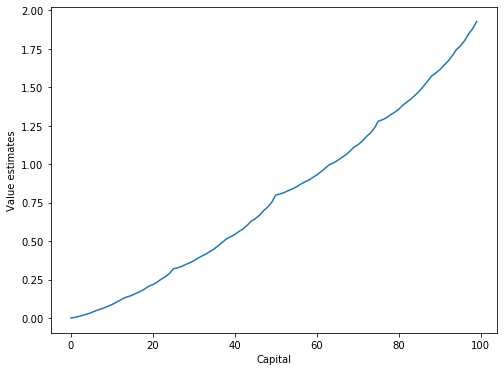

In [179]:
# generate some plots similar to the ones in the book
x = range(100)
y= [0]
y.extend(list(values.values())[:99])
 
plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

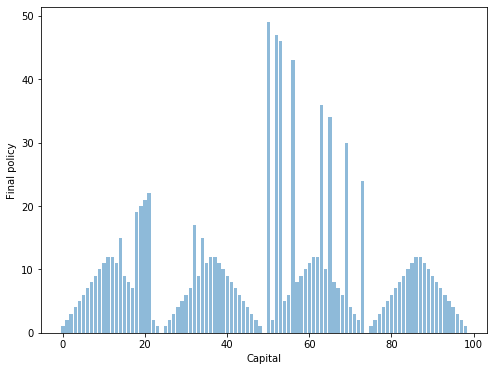

In [180]:
x = range(99)
y = list(policy.values())[:100]
 
plt.figure(figsize=(8,6))
plt.bar(x, y, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Final policy')
plt.show()

The graph does not exactly match the one in the book because, as said in the book, there are several optimal policies!

### Probability of getting heads = 0.25

And including some impatice (< 1)!

In [189]:
# run the algorithm
policy, values = value_iteration(0.25, 0.001, 0.8)

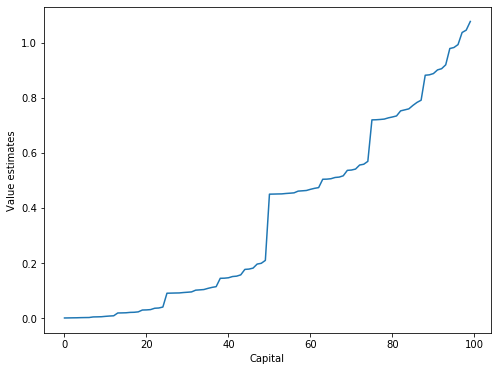

In [190]:
# generate some plots similar to the ones in the book
x = range(100)
y= [0]
y.extend(list(values.values())[:99])
 
plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

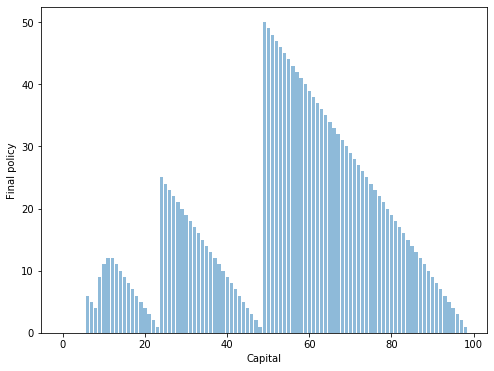

In [191]:
x = range(99)
y = list(policy.values())[:100]
 
plt.figure(figsize=(8,6))
plt.bar(x, y, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Final policy')
plt.show()

### Probability of getting heads = 0.55

In [192]:
# run the algorithm
policy, values = value_iteration(0.55, 0.001, 0.8)

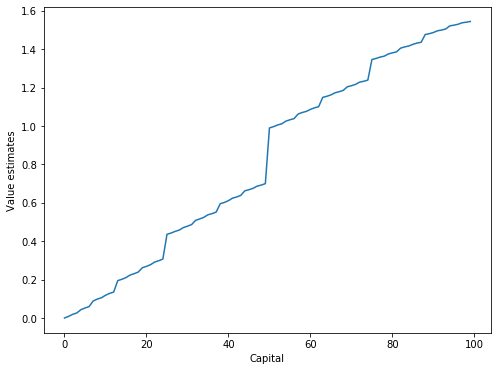

In [193]:
# generate some plots similar to the ones in the book
x = range(100)
y= [0]
y.extend(list(values.values())[:99])
 
plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

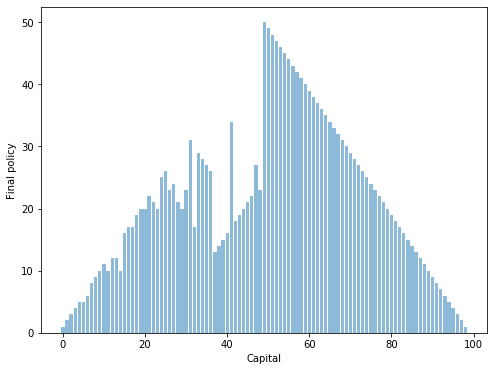

In [194]:
x = range(99)
y = list(policy.values())[:100]
 
plt.figure(figsize=(8,6))
plt.bar(x, y, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Final policy')
plt.show()

### Are results stable when $\theta$ goes to zero?

In [201]:
# run the algorithm
thetas = [0.001, 0.0001, 0.000001]
all_policies = []
all_values = []
for theta in thetas:
    policy, values = value_iteration(0.55, theta, 0.8)
    all_policies.append(policy)
    all_values.append(values)

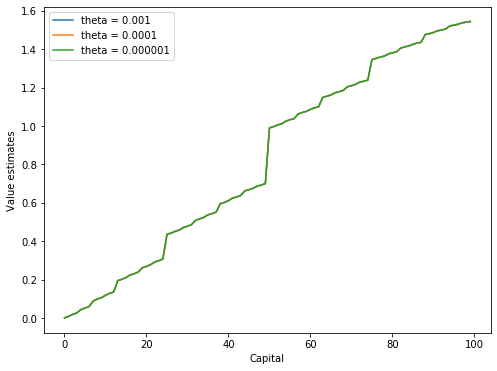

In [202]:
# generate some plots similar to the ones in the book
x = range(100)
y1= [0]
y1.extend(list(all_values[0].values())[:99])
y2= [0]
y2.extend(list(all_values[1].values())[:99])
y3= [0]
y3.extend(list(all_values[2].values())[:99])
 
plt.figure(figsize=(8,6))
plt.plot(x, y1, label= 'theta = 0.001')
plt.plot(x, y2, label= 'theta = 0.0001')
plt.plot(x, y3, label= 'theta = 0.000001')
plt.legend()
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()



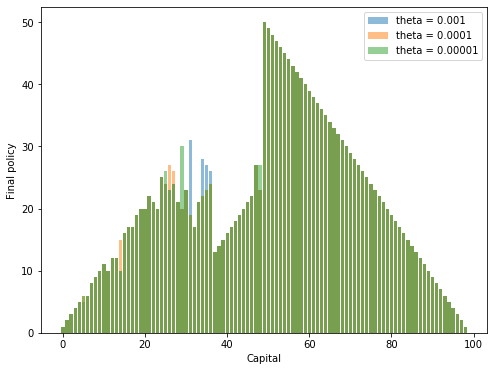

In [204]:
x = range(99)
y1 = list(all_policies[0].values())[:100]
y2 = list(all_policies[1].values())[:100]
y3 = list(all_policies[2].values())[:100]
 
plt.figure(figsize=(8,6))
plt.bar(x, y1, align='center', alpha=0.5, label = 'theta = 0.001')
plt.bar(x, y2, align='center', alpha=0.5, label = 'theta = 0.0001')
plt.bar(x, y3, align='center', alpha=0.5, label = 'theta = 0.000001')
plt.legend()
plt.xlabel('Capital')
plt.ylabel('Final policy')
plt.show()

Although the policy is not exactly the same for each value of theta, it actually seems to be mostly stable as theta goes to zero.